In [2]:
import os,sys
os.environ["SPARK_HOME"] = '/usr/hdp/current/spark-client'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-csv_2.11:1.2.0 pyspark-shell'
sys.path.insert(0, os.path.join(os.environ["SPARK_HOME"], 'python'))

# import package
import pyspark
from pyspark.context import SparkContext, SparkConf


In [3]:
conf = SparkConf()
conf.set("spark.ui.port", "5146")
sc = SparkContext(conf=conf)

In [4]:
import string
import pandas as pd

In [5]:

from pyspark import sql
from pyspark.sql import SQLContext
from pyspark.sql.functions import avg

In [6]:
sqlct = SQLContext(sc)

In [7]:
%%sh
pwd

/home/vkundrapu1/Hadoop/Project


In [163]:
%%sh
hdfs dfs -ls /data/MSA_8050_Spring_18/proj10

Found 10 items
-rw-r--r--   3 pkalavai2 hdfs       4656 2018-04-28 17:19 /data/MSA_8050_Spring_18/proj10/sample-yelp-review.csv
-rw-r--r--   3 pkalavai2 hdfs   70015437 2018-04-29 20:13 /data/MSA_8050_Spring_18/proj10/sample100k.csv
-rw-r--r--   3 pkalavai2 hdfs    1873475 2018-04-28 18:41 /data/MSA_8050_Spring_18/proj10/sample2k.csv
-rw-r--r--   3 pkalavai2 hdfs   31760674 2018-04-27 17:34 /data/MSA_8050_Spring_18/proj10/yelp_business.csv
-rw-r--r--   3 pkalavai2 hdfs   41377121 2018-04-27 17:34 /data/MSA_8050_Spring_18/proj10/yelp_business_attributes.csv
-rw-r--r--   3 pkalavai2 hdfs   13866351 2018-04-27 17:34 /data/MSA_8050_Spring_18/proj10/yelp_business_hours.csv
-rw-r--r--   3 pkalavai2 hdfs  135964892 2018-04-27 17:34 /data/MSA_8050_Spring_18/proj10/yelp_checkin.csv
-rw-r--r--   3 pkalavai2 hdfs 3791120545 2018-04-27 17:31 /data/MSA_8050_Spring_18/proj10/yelp_review.csv
-rw-r--r--   3 pkalavai2 hdfs  148085910 2018-04-27 17:33 /data/MSA_8050_Spring_18/proj10/yelp_tip.csv
-rw-r--

In [9]:
loc='/data/MSA_8050_Spring_18/proj10'

In [177]:
review_rdd = sc.textFile(os.path.join(loc, 'sample2k.csv'))

In [178]:
review_rdd.take(5)

[u'review_id,user_id,business_id,stars,date,text,useful,funny,cool',
 u'vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,"Super simple place but amazing nonetheless. It\'s been around since the 30\'s and they still serve the same thing they started with: a bologna and salami sandwich with mustard. ',
 u'',
 u'Staff was very helpful and friendly.",0,0,0',
 u'n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,"Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. ']

In [179]:
pdf = pd.read_csv('sample2k.csv')

In [180]:
pdf = pdf.replace({r'\\r': ''}, regex=True)
pdf = pdf.replace({r'\\n': ''}, regex=True)

In [182]:
df = sqlct.createDataFrame(pdf)

IOError: [Errno 28] No space left on device

In [12]:
rdd= df.rdd

In [13]:
rdd.first()

Row(review_id=u'vkVSCC7xljjrAI4UGfnKEQ', user_id=u'bv2nCi5Qv5vroFiqKGopiw', business_id=u'AEx2SYEUJmTxVVB18LlCwA', stars=5, date=u'2016-05-28', text=u"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly.", useful=0, funny=0, cool=0)

In [18]:
rdd.count()

2001

# Stop Words

In [285]:
stop1 = ['Im','My',' ','an','from','there','what','They','when','We','which','their','how', 'its', 'would', 'if', 'were', 'has', 'because', 'by', 'them', 'we', 'had', 'they', 'us', 'your', 'or', 'me', 'these', 'those', 'after', 'before', 'will', 'off', 'up', 'down', 'out', 'be', 'all', 'at', 'just', 'The', 'are', 'one', 'not', '', 'the', 'I', 'and', 'to', 'it', 'a', 'for', 'any', 'this', 'is', 'my', 'of', 'in', 'with', 'have', 'as', 'on', 'that', 'so', 'you', 'This', 'but', 'was', 'It']

from nltk.corpus import stopwords
stop2 = stopwords.words("english")
stop3 = stop1+stop2

In [276]:
stop3

[' ',
 'an',
 'from',
 'there',
 'what',
 'They',
 'when',
 'We',
 'which',
 'their',
 'how',
 'its',
 'would',
 'if',
 'were',
 'has',
 'because',
 'by',
 'them',
 'we',
 'had',
 'they',
 'us',
 'your',
 'or',
 'me',
 'these',
 'those',
 'after',
 'before',
 'will',
 'off',
 'up',
 'down',
 'out',
 'be',
 'all',
 'at',
 'just',
 'The',
 'are',
 'one',
 'not',
 '',
 'the',
 'I',
 'and',
 'to',
 'it',
 'a',
 'for',
 'any',
 'this',
 'is',
 'my',
 'of',
 'in',
 'with',
 'have',
 'as',
 'on',
 'that',
 'so',
 'you',
 'This',
 'but',
 'was',
 'It',
 u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',


In [46]:
table = dict((ord(char), None) for char in string.punctuation)

In [47]:
pairs = rdd.map(lambda x: (x[3],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop)

In [48]:
pairs5.take(10)

[((3, u'foisci'), 2),
 ((2, u'carry'), 4),
 ((4, u'dulce'), 2),
 ((2, u'date'), 1),
 ((4, u'longue'), 1),
 ((5, u'cute'), 8),
 ((2, u'hype'), 1),
 ((3, u'practically'), 3),
 ((3, u'format'), 1),
 ((3, u'pu'), 7)]

In [49]:
rating = [1, 2, 3, 4, 5]
res = []
for value in rating:
        pairs6 = pairs5.filter(lambda x: value in x[0])
        pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
        pairs8 = pairs7.map(lambda x: x[0][1])
        res.append(pairs8.take(20))

# # print the result
# print "top 20 common words"
# print res
print "top 20 common words"
for i in range(0, 5):
        print "%d star rating:" % (i+1),
        print res[i]


top 20 common words
1 star rating: [u'I', u'', u'The', u'place', u'one', u'would', u'back', u'food', u'get', u'service', u'like', u'said', u'This', u'de', u'go', u'time', u'really', u'us', u'even', u'asked']
2 star rating: [u'', u'I', u'The', u'place', u'food', u'good', u'like', u'It', u'one', u'time', u'would', u'get', u'We', u'Im', u'go', u'really', u'back', u'service', u'ordered', u'little']
3 star rating: [u'', u'I', u'The', u'good', u'place', u'food', u'It', u'like', u'de', u'one', u'time', u'would', u'get', u'really', u'go', u'et', u'Im', u'We', u'little', u'This']
4 star rating: [u'', u'I', u'The', u'place', u'good', u'one', u'de', u'food', u'great', u'like', u'time', u'It', u'really', u'get', u'et', u'Im', u'go', u'Ive', u'also', u'would']
5 star rating: [u'', u'I', u'The', u'place', u'one', u'great', u'time', u'They', u'like', u'well', u'get', u'food', u'good', u'back', u'It', u'always', u'This', u'Im', u'Ive', u'really']


# Stars - Length

In [20]:
pairs = rdd.map(lambda x: (x.split(",")[1], x.split(",")[5]))

pairs1 = pairs.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.mapValues(lambda x: len(x.split(" ")))

#Create DataFrame
dataDF = pairs2.toDF(["stars", "length"])
res = dataDF.groupBy("stars").agg(avg("length"))

print res.collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 5.0 failed 1 times, most recent failure: Lost task 0.0 in stage 5.0 (TID 38, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/hdp/current/spark-client/python/pyspark/rdd.py", line 1293, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-20-27e38e52d387>", line 1, in <lambda>
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/sql/types.py", line 1269, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:313)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:277)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1433)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1420)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1420)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1590)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:622)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1831)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1844)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1857)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:393)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/hdp/current/spark-client/python/pyspark/rdd.py", line 1293, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-20-27e38e52d387>", line 1, in <lambda>
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/sql/types.py", line 1269, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:313)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:277)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [23]:
pairs.show()

AttributeError: 'PipelinedRDD' object has no attribute 'show'

In [16]:
from collections import Counter

In [41]:
def analyse_eachline(eachline):
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in eachline.split(",")[5] if ch not in exclude) 
    return (eachline.split(",")[3],s)
result = rdd.map(analyse_eachline)
result.collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 6 in stage 361.0 failed 1 times, most recent failure: Lost task 6.0 in stage 361.0 (TID 3125, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-41-095d3cf3a6d4>", line 3, in analyse_eachline
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/sql/types.py", line 1269, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:313)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:277)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1433)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1420)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1420)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1590)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:622)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1831)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1844)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1857)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1928)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:934)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:323)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:933)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor81.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-41-095d3cf3a6d4>", line 3, in analyse_eachline
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/sql/types.py", line 1269, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:313)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:277)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [40]:
def split_eachline(eachline):
    return (eachline[0],(len(eachline[1].split(" ")),1))
result1 = result.map(split_eachline)
result1.collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 360.0 failed 1 times, most recent failure: Lost task 3.0 in stage 360.0 (TID 3090, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-21-095d3cf3a6d4>", line 3, in analyse_eachline
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/sql/types.py", line 1269, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:313)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:277)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1433)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1420)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1420)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1590)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:622)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1831)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1844)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1857)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1928)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:934)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:323)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:933)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor81.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-21-095d3cf3a6d4>", line 3, in analyse_eachline
  File "/usr/hdp/current/spark-client/python/lib/pyspark.zip/pyspark/sql/types.py", line 1269, in __getattr__
    raise AttributeError(item)
AttributeError: split

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:313)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:277)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [27]:
result2 = result1.reduceByKey(lambda x,y:(x[0]+y[0],x[1]+y[1]))

In [28]:
result3 = result2.collect()

In [29]:
for i in result3:
    print(i[0], "star rating: average length of comments", i[1][0]/i[1][1])

(u'3', 'star rating: average length of comments', 8)
(u'5', 'star rating: average length of comments', 63)
(u'stars', 'star rating: average length of comments', 1)
(u'4', 'star rating: average length of comments', 37)


In [34]:
Hfrewords = review_rdd.map(lambda line: line.split(",")).map(lambda line: (line[1]," ".join(line[5].strip().split(" ")).lower())).map(lambda line: (line[0],line[1].split(" "))).reduceByKey(lambda x,y: (x+y) ).map(lambda line:(line[0], Counter(line[1]).most_common(10)) ).collectAsMap()

In [35]:
print(Hfrewords)

{u'u0LXt3Uea_GidxRW1xcsfg': [(u'and', 5), (u'the', 5), (u'to', 4), (u'of', 3), (u'that', 3), (u'this', 3), (u'is', 3), (u'have', 3), (u'you', 3), (u'vietnamese', 2)], u'user_id': [(u'text', 1)], u'bv2nCi5Qv5vroFiqKGopiw': [(u'and', 14), (u'the', 12), (u'a', 9), (u'for', 6), (u'their', 6), (u'to', 5), (u'but', 5), (u'out', 4), (u'they', 3), (u'place', 3)], u'_4iMDXbXZ1p1ONG297YEAQ': [(u'and', 3), (u'for', 3), (u'was', 3), (u'a', 3), (u'the', 3), (u'much', 2), (u'had', 2), (u'vegas', 2), (u'las', 2), (u'so', 2)]}


# Most Popular Categories

In [ ]:
# %%sh
# hdfs dfs -get /data/MSA_8050_Spring_18/proj10/sample2k.csv

In [10]:
df_bus = sqlct.read.format("com.databricks.spark.csv").options(charset="ISO-8859-1",separator = ',', multiline=True, header=True, inferSchema = True).load(os.path.join(loc, 'yelp_business.csv'))

In [11]:
rdd_bus = df_bus.rdd

In [12]:
rdd_bus.take(5)

[Row(business_id=u'FYWN1wneV18bWNgQjJ2GNg', name=u'"Dental by Design"', neighborhood=u'', address=u'"4855 E Warner Rd, Ste B9"', city=u'Ahwatukee', state=u'AZ', postal_code=u'85044', latitude=33.3306902, longitude=-111.9785992, stars=4.0, review_count=22, is_open=1, categories=u'Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists'),
 Row(business_id=u'He-G7vWjzVUysIKrfNbPUQ', name=u'"Stephen Szabo Salon"', neighborhood=u'', address=u'"3101 Washington Rd"', city=u'McMurray', state=u'PA', postal_code=u'15317', latitude=40.2916853, longitude=-80.1048999, stars=3.0, review_count=11, is_open=1, categories=u"Hair Stylists;Hair Salons;Men's Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas"),
 Row(business_id=u'KQPW8lFf1y5BT2MxiSZ3QA', name=u'"Western Motor Vehicle"', neighborhood=u'', address=u'"6025 N 27th Ave, Ste 1"', city=u'Phoenix', state=u'AZ', postal_code=u'85017', latitude=33.5249025, longitude=-112.1153098, stars=1.5, review_count=

In [85]:
pairs = rdd_bus.map(lambda x: (x[12]))
pairs0 = pairs.map(lambda x: (x.split(";")))
# # pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs1 = pairs0.flatMap(lambda x: x)
pairs2 = pairs1.map(lambda x: (x, 1))
pairs3 = pairs2.reduceByKey(lambda x, y: x+y)
# pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs4 = pairs3.sortBy(lambda x: x[1], ascending=False)
pairs4.take(20)

[(u'Restaurants', 54618),
 (u'Shopping', 27971),
 (u'Food', 24777),
 (u'Beauty & Spas', 17014),
 (u'Home Services', 16205),
 (u'Health & Medical', 14230),
 (u'Nightlife', 12154),
 (u'Local Services', 11232),
 (u'Automotive', 11052),
 (u'Bars', 10563),
 (u'Event Planning & Services', 9078),
 (u'Active Life', 8257),
 (u'Fashion', 7019),
 (u'Sandwiches', 6345),
 (u'Fast Food', 6280),
 (u'Hair Salons', 6140),
 (u'American (Traditional)', 6097),
 (u'Pizza', 6067),
 (u'Coffee & Tea', 5936),
 (u'Hotels & Travel', 5736)]

# Top Ten States with the most Business parties mentioned in Yelp

In [87]:
pairs = rdd_bus.map(lambda x: (x[5]))
# pairs0 = pairs.map(lambda x: (x.split(";")))
# # pairs1 = pairs0.mapValues(lambda x: x.translate(table))
# pairs1 = pairs.flatMap(lambda x: x)
pairs2 = pairs.map(lambda x: (x, 1))
pairs3 = pairs2.reduceByKey(lambda x, y: x+y)
# pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs4 = pairs3.sortBy(lambda x: x[1], ascending=False)
pairs4.take(10)

[(u'AZ', 52214),
 (u'NV', 33086),
 (u'ON', 30208),
 (u'NC', 12956),
 (u'OH', 12609),
 (u'PA', 10109),
 (u'QC', 8169),
 (u'WI', 4754),
 (u'EDH', 3795),
 (u'BW', 3118)]

# Top Ten Cities with the most Business parties mentioned in Yelp

In [86]:
pairs = rdd_bus.map(lambda x: (x[4]))
# pairs0 = pairs.map(lambda x: (x.split(";")))
# # pairs1 = pairs0.mapValues(lambda x: x.translate(table))
# pairs1 = pairs.flatMap(lambda x: x)
pairs2 = pairs.map(lambda x: (x, 1))
pairs3 = pairs2.reduceByKey(lambda x, y: x+y)
# pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs4 = pairs3.sortBy(lambda x: x[1], ascending=False)
pairs4.take(10)


[(u'Las Vegas', 26775),
 (u'Phoenix', 17213),
 (u'Toronto', 17206),
 (u'Charlotte', 8553),
 (u'Scottsdale', 8228),
 (u'Pittsburgh', 6355),
 (u'Mesa', 5760),
 (u'Montr\xc3\xa9al', 5709),
 (u'Henderson', 4465),
 (u'Tempe', 4263),
 (u'Chandler', 3994),
 (u'Edinburgh', 3868),
 (u'Cleveland', 3322),
 (u'Madison', 3213),
 (u'Glendale', 3206),
 (u'Gilbert', 3128),
 (u'Mississauga', 2726),
 (u'Stuttgart', 2000),
 (u'Peoria', 1706),
 (u'Markham', 1564)]

In [110]:
pairs = rdd_bus.map(lambda x: (x[4],x[10]))

In [111]:
pairs.take(5)

[(u'Ahwatukee', 22),
 (u'McMurray', 11),
 (u'Phoenix', 18),
 (u'Tempe', 9),
 (u'Cuyahoga Falls', 116)]

In [139]:
df_city = pairs.toDF(["City","No_Of_Reviews"])

In [149]:
import pyspark.sql.functions as func
from pyspark.sql.functions import desc

In [155]:
df_city_agg = df_city.groupby("City").agg(func.count(func.lit(1)).alias("No_of_Business"),func.mean("No_Of_Reviews").alias("average_reviews"))

In [156]:
df_city_agg = df_city_agg.sort(desc("No_of_Business"))

In [159]:
df_city_agg = df_city_agg.show(10)

+----------+--------------+------------------+
|      City|No_of_Business|   average_reviews|
+----------+--------------+------------------+
| Las Vegas|         26775|59.913090569561156|
|   Phoenix|         17213|33.504270028466856|
|   Toronto|         17206| 25.04492618853888|
| Charlotte|          8553| 27.72302116216532|
|Scottsdale|          8228| 37.49744773942635|
|Pittsburgh|          6355| 28.24091266719119|
|      Mesa|          5760|22.722743055555554|
| MontrÃ©al|          5709|21.478367489928182|
| Henderson|          4465| 37.37603583426652|
|     Tempe|          4263| 38.18250058644147|
+----------+--------------+------------------+
only showing top 10 rows



# Top business with more reviews and high rating

In [109]:
pairs = rdd_bus.map(lambda x: (x[1],x[10],x[9]))
# pairs0 = pairs.map(lambda x: (x.split(";")))
# # pairs1 = pairs0.mapValues(lambda x: x.translate(table))
# pairs1 = pairs.flatMap(lambda x: x)
# pairs2 = pairs.map(lambda x: (x, 1))
# pairs3 = pairs2.reduceByKey(lambda x, y: x+y)
# pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs4 = pairs.sortBy(lambda x: x[1], ascending=False)#.sortBy(lambda x: x[2], ascending=False)
pairs4.take(10)

[(u'"Mon Ami Gabi"', 7361, 4.0),
 (u'"Bacchanal Buffet"', 7009, 4.0),
 (u'"Wicked Spoon"', 5950, 3.5),
 (u'"Gordon Ramsay BurGR"', 5447, 4.0),
 (u'"Earl of Sandwich"', 4869, 4.5),
 (u'"Hash House A Go Go"', 4774, 4.0),
 (u'"The Buffet"', 4018, 3.5),
 (u'"Lotus of Siam"', 3964, 4.0),
 (u'"Serendipity 3"', 3910, 3.0),
 (u'"The Buffet at Bellagio"', 3838, 3.5)]

In [206]:
x = rdd_bus.map(lambda x:x).filter(lambda x: x[1]=='"Mon Ami Gabi"')

In [209]:
x.collect()

[Row(business_id=u'4JNXUYY8wbaaDmk3BPzlWw', name=u'"Mon Ami Gabi"', neighborhood=u'The Strip', address=u'"3655 Las Vegas Blvd S"', city=u'Las Vegas', state=u'NV', postal_code=u'89109', latitude=36.1128270642, longitude=-115.172581497, stars=4.0, review_count=7361, is_open=1, categories=u'French;Steakhouses;Restaurants;Breakfast & Brunch')]

# Business with most Five Star Reviews from Users

In [185]:
df_rev = sqlct.read.format("com.databricks.spark.csv").options(charset="ISO-8859-1",separator = ',', multiline=True, header=True, inferSchema = True).load(os.path.join(loc, 'sample100k.csv'))

In [186]:
rdd_rev = df_rev.rdd

In [187]:
rdd_rev.take(5)

[Row(review_id=u'vkVSCC7xljjrAI4UGfnKEQ', user_id=u'bv2nCi5Qv5vroFiqKGopiw', business_id=u'AEx2SYEUJmTxVVB18LlCwA', stars=5, date=u'2016-05-28', text=u"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. Staff was very helpful and friendly.", useful=0, funny=0, cool=0),
 Row(review_id=u'n6QzIUObkYshz4dz2QRJTw', user_id=u'bv2nCi5Qv5vroFiqKGopiw', business_id=u'VR6GpWIda3SfvPC-lg9H3w', stars=5, date=u'2016-05-28', text=u"Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. We had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. A bit outside of downtown montreal but take the metro out and it's 

In [216]:
pairs = rdd_rev.map(lambda x: x).filter(lambda x: x[3]==5)
pairs1 = pairs.map(lambda x: (x[2]))
# pairs0 = pairs.map(lambda x: (x.split(";")))
# # pairs1 = pairs0.mapValues(lambda x: x.translate(table))
# pairs1 = pairs.flatMap(lambda x: x)
pairs2 = pairs1.map(lambda x: (x, 1))
pairs3 = pairs2.reduceByKey(lambda x, y: x+y)
# # pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs4 = pairs3.sortBy(lambda x: x[1], ascending=False)
pairs4.take(10)

[(u'DkYS3arLOhA8si5uUEmHOw', 50),
 (u'cYwJA2A6I12KNkm2rtXd5g', 49),
 (u'4JNXUYY8wbaaDmk3BPzlWw', 48),
 (u'f4x1YBxkLrZg652xt2KR5g', 45),
 (u'KskYqH1Bi7Z_61pH6Om8pg', 44),
 (u'hihud--QRriCYZw1zZvW4g', 38),
 (u'K7lWdNUhCbcnEvI0NhGewg', 38),
 (u'5LNZ67Yw9RD6nf4_UhXOjw', 35),
 (u'RESDUcs7fIiihp38-d6_6g', 32),
 (u'mz9ltimeAIy2c2qf5ctljw', 31)]

# Analysis of review data

In [250]:
table = dict((ord(char), None) for char in string.punctuation)

In [249]:
#  average length y Ratingb
pairs = rdd_rev.map(lambda x: (x[3],x[5]))

pairs1 = pairs.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.mapValues(lambda x: len(x.split(" ")))

#Create DataFrame
dataDF = pairs2.toDF(["stars", "length"])
res = dataDF.groupBy("stars").agg(avg("length"))
res = res.sort(desc("avg(length)"))
res.show()

+-----+------------------+
|stars|       avg(length)|
+-----+------------------+
|    1| 147.7015904123012|
|    2|143.92538211577806|
|    3|134.57698170731706|
|    4|115.10038917018872|
|    5| 90.92858146067415|
+-----+------------------+



In [358]:
pairs = rdd_rev.map(lambda x: (x[3],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
rating = [1, 2, 3, 4, 5]
res = []
for value in rating:
        pairs6 = pairs5.filter(lambda x: value in x[0])
        pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
        pairs8 = pairs7.map(lambda x: x[0][1])
        res.append(pairs8.take(20))

# # print the result
# print "top 20 common words"
# print res
print "top 20 common words"
for i in range(0, 5):
        print "%d star rating:" % (i+1),
        print res[i]

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 546.0 failed 1 times, most recent failure: Lost task 1.0 in stage 546.0 (TID 3343, localhost): java.io.IOException: No space left on device
	at java.io.FileOutputStream.writeBytes(Native Method)
	at java.io.FileOutputStream.write(FileOutputStream.java:326)
	at org.apache.spark.storage.TimeTrackingOutputStream.write(TimeTrackingOutputStream.java:58)
	at java.io.BufferedOutputStream.flushBuffer(BufferedOutputStream.java:82)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:126)
	at org.xerial.snappy.SnappyOutputStream.dumpOutput(SnappyOutputStream.java:360)
	at org.xerial.snappy.SnappyOutputStream.compressInput(SnappyOutputStream.java:374)
	at org.xerial.snappy.SnappyOutputStream.write(SnappyOutputStream.java:130)
	at org.apache.spark.io.SnappyOutputStreamWrapper.write(CompressionCodec.scala:202)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.writeByte(ObjectOutputStream.java:1915)
	at java.io.ObjectOutputStream.writeFatalException(ObjectOutputStream.java:1576)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:351)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:44)
	at org.apache.spark.serializer.SerializationStream.writeValue(Serializer.scala:147)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:186)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:151)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1433)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1420)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1420)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1590)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:622)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1831)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1844)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1857)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1928)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:934)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:323)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:933)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor278.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.io.IOException: No space left on device
	at java.io.FileOutputStream.writeBytes(Native Method)
	at java.io.FileOutputStream.write(FileOutputStream.java:326)
	at org.apache.spark.storage.TimeTrackingOutputStream.write(TimeTrackingOutputStream.java:58)
	at java.io.BufferedOutputStream.flushBuffer(BufferedOutputStream.java:82)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:126)
	at org.xerial.snappy.SnappyOutputStream.dumpOutput(SnappyOutputStream.java:360)
	at org.xerial.snappy.SnappyOutputStream.compressInput(SnappyOutputStream.java:374)
	at org.xerial.snappy.SnappyOutputStream.write(SnappyOutputStream.java:130)
	at org.apache.spark.io.SnappyOutputStreamWrapper.write(CompressionCodec.scala:202)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.writeByte(ObjectOutputStream.java:1915)
	at java.io.ObjectOutputStream.writeFatalException(ObjectOutputStream.java:1576)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:351)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:44)
	at org.apache.spark.serializer.SerializationStream.writeValue(Serializer.scala:147)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:186)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:151)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [288]:
rdd_rev5 = rdd_rev.map(lambda x: x).filter(lambda x: x[3]==5)

In [388]:
pairs = rdd_rev5.map(lambda x: (x[5]))
pairs0 = pairs.map(lambda x: x.replace("\n", " "))
pairs1 = pairs0.map(lambda x: x.translate(table))
pairs2 = pairs1.flatMap(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0] in stop3)
# rating = [1, 2, 3, 4, 5]
# res = []
# for value in rating:
# pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs5.sortBy(lambda x: x[1], ascending=False)
pairs7.take(30)
# pairs8 = pairs7.map(lambda x: x[0][1])

[(u'place', 19297),
 (u'great', 18238),
 (u'food', 15210),
 (u'good', 13664),
 (u'time', 12526),
 (u'service', 11583),
 (u'get', 10330),
 (u'back', 10035),
 (u'like', 9967),
 (u'go', 8956),
 (u'best', 8611),
 (u'always', 8201),
 (u'really', 8200),
 (u'also', 7442),
 (u'friendly', 7256),
 (u'amazing', 7151),
 (u'Ive', 7026),
 (u'staff', 6869),
 (u'love', 6857),
 (u'recommend', 6622),
 (u'well', 6356),
 (u'nice', 6204),
 (u'delicious', 5764),
 (u'definitely', 5711),
 (u'got', 5668),
 (u'even', 5421),
 (u'made', 5144),
 (u'try', 5107),
 (u'experience', 5102),
 (u'first', 4756)]

In [331]:
rdd_rev1 = rdd_rev.map(lambda x: x).filter(lambda x: x[3]==1)

In [389]:
pairs = rdd_rev1.map(lambda x: (x[5]))
pairs0 = pairs.map(lambda x: x.replace("\n", " "))
pairs1 = pairs0.map(lambda x: x.translate(table))
pairs2 = pairs1.flatMap(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0] in stop3)
# rating = [1, 2, 3, 4, 5]
# res = []
# for value in rating:
# pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs5.sortBy(lambda x: x[1], ascending=False)
pairs7.take(30)
# pairs8 = pairs7.map(lambda x: x[0][1])

[(u'get', 6649),
 (u'back', 6245),
 (u'time', 6150),
 (u'place', 6007),
 (u'food', 5931),
 (u'service', 5863),
 (u'like', 5376),
 (u'said', 5026),
 (u'told', 4614),
 (u'even', 4548),
 (u'go', 4485),
 (u'never', 4030),
 (u'didnt', 3943),
 (u'dont', 3703),
 (u'got', 3657),
 (u'asked', 3504),
 (u'could', 3483),
 (u'order', 3387),
 (u'good', 3317),
 (u'came', 3126),
 (u'minutes', 3020),
 (u'went', 2957),
 (u'people', 2819),
 (u'customer', 2711),
 (u'going', 2654),
 (u'know', 2546),
 (u'ordered', 2420),
 (u'called', 2418),
 (u'car', 2393),
 (u'manager', 2347)]

# Freequent words in reviews which are useful, Funny, Cool from rating 5

In [417]:
pairs = rdd_rev5.map(lambda x: (x[6],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  useful:" % (i+1),
#         print res[i]
pairs8.take(30)

[(u'place', 4137),
 (u'great', 3855),
 (u'food', 3165),
 (u'good', 3025),
 (u'time', 2696),
 (u'service', 2391),
 (u'get', 2208),
 (u'like', 2188),
 (u'back', 2081),
 (u'place', 2028),
 (u'go', 1963),
 (u'really', 1880),
 (u'great', 1839),
 (u'best', 1797),
 (u'always', 1789),
 (u'also', 1653),
 (u'Ive', 1546),
 (u'friendly', 1529),
 (u'food', 1522),
 (u'amazing', 1510),
 (u'love', 1504),
 (u'staff', 1467),
 (u'good', 1457),
 (u'well', 1405),
 (u'recommend', 1361),
 (u'time', 1358),
 (u'nice', 1345),
 (u'get', 1325),
 (u'delicious', 1307),
 (u'like', 1287)]

In [418]:
pairs = rdd_rev5.map(lambda x: (x[7],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  useful:" % (i+1),
#         print res[i]
pairs8.take(30)

[(u'place', 2355),
 (u'great', 1933),
 (u'good', 1733),
 (u'food', 1662),
 (u'time', 1533),
 (u'get', 1454),
 (u'like', 1423),
 (u'service', 1140),
 (u'back', 1135),
 (u'go', 1088),
 (u'really', 1083),
 (u'also', 976),
 (u'best', 955),
 (u'love', 923),
 (u'always', 919),
 (u'Ive', 895),
 (u'well', 786),
 (u'nice', 752),
 (u'friendly', 747),
 (u'place', 736),
 (u'staff', 734),
 (u'amazing', 708),
 (u'delicious', 696),
 (u'got', 678),
 (u'even', 675),
 (u'dont', 658),
 (u'definitely', 645),
 (u'try', 637),
 (u'made', 625),
 (u'little', 600)]

In [442]:
pairs = rdd_rev5.map(lambda x: (x[8],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  Cool:" % (i+1),
#         print res[i]
pairs8.take(30)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2243.0 failed 1 times, most recent failure: Lost task 0.0 in stage 2243.0 (TID 4763, localhost): java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:51)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at sun.nio.ch.FileChannelImpl.transferToTrustedChannel(FileChannelImpl.java:516)
	at sun.nio.ch.FileChannelImpl.transferTo(FileChannelImpl.java:612)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply$mcJ$sp(Utils.scala:265)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:254)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:254)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1239)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:294)
	at org.apache.spark.util.Utils.copyStream(Utils.scala)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.writePartitionedFile(BypassMergeSortShuffleWriter.java:197)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:161)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1433)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1420)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1420)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1590)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:622)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1831)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1844)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1857)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1928)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:934)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:323)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:933)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor278.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:51)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at sun.nio.ch.FileChannelImpl.transferToTrustedChannel(FileChannelImpl.java:516)
	at sun.nio.ch.FileChannelImpl.transferTo(FileChannelImpl.java:612)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply$mcJ$sp(Utils.scala:265)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:254)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:254)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1239)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:294)
	at org.apache.spark.util.Utils.copyStream(Utils.scala)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.writePartitionedFile(BypassMergeSortShuffleWriter.java:197)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:161)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


# Freequent words in reviews which are useful, Funny, Cool from rating 1

In [431]:
pairs = rdd_rev1.map(lambda x: (x[6],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  usefull:" % (i+1),
#         print res[i]
pairs8.take(30)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2221.0 failed 1 times, most recent failure: Lost task 0.0 in stage 2221.0 (TID 4741, localhost): java.io.IOException: No space left on device
	at java.io.FileOutputStream.writeBytes(Native Method)
	at java.io.FileOutputStream.write(FileOutputStream.java:326)
	at org.apache.spark.storage.TimeTrackingOutputStream.write(TimeTrackingOutputStream.java:58)
	at java.io.BufferedOutputStream.flushBuffer(BufferedOutputStream.java:82)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:126)
	at org.xerial.snappy.SnappyOutputStream.dumpOutput(SnappyOutputStream.java:360)
	at org.xerial.snappy.SnappyOutputStream.compressInput(SnappyOutputStream.java:374)
	at org.xerial.snappy.SnappyOutputStream.write(SnappyOutputStream.java:130)
	at org.apache.spark.io.SnappyOutputStreamWrapper.write(CompressionCodec.scala:202)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.writeByte(ObjectOutputStream.java:1915)
	at java.io.ObjectOutputStream.writeFatalException(ObjectOutputStream.java:1576)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:351)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:44)
	at org.apache.spark.serializer.SerializationStream.writeValue(Serializer.scala:147)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:186)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:151)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1433)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1420)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1420)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:801)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:801)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1590)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:622)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1831)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1844)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1857)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1928)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:934)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:323)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:933)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor278.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.io.IOException: No space left on device
	at java.io.FileOutputStream.writeBytes(Native Method)
	at java.io.FileOutputStream.write(FileOutputStream.java:326)
	at org.apache.spark.storage.TimeTrackingOutputStream.write(TimeTrackingOutputStream.java:58)
	at java.io.BufferedOutputStream.flushBuffer(BufferedOutputStream.java:82)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:126)
	at org.xerial.snappy.SnappyOutputStream.dumpOutput(SnappyOutputStream.java:360)
	at org.xerial.snappy.SnappyOutputStream.compressInput(SnappyOutputStream.java:374)
	at org.xerial.snappy.SnappyOutputStream.write(SnappyOutputStream.java:130)
	at org.apache.spark.io.SnappyOutputStreamWrapper.write(CompressionCodec.scala:202)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.writeByte(ObjectOutputStream.java:1915)
	at java.io.ObjectOutputStream.writeFatalException(ObjectOutputStream.java:1576)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:351)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:44)
	at org.apache.spark.serializer.SerializationStream.writeValue(Serializer.scala:147)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:186)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:151)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [ ]:
pairs = rdd_rev1.map(lambda x: (x[7],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  funny:" % (i+1),
#         print res[i]
pairs8.take(30)

In [ ]:
pairs = rdd_rev1.map(lambda x: (x[8],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  cool:" % (i+1),
#         print res[i]
pairs8.take(30)

# Analysis of Business with Highest reviews

In [292]:
high_r = rdd_rev.map(lambda x: x).filter(lambda x: x[2]=='4JNXUYY8wbaaDmk3BPzlWw')

In [224]:
table = dict((ord(char), None) for char in string.punctuation)

In [ ]:
#  average length by Rating

In [248]:
#  average length by Rating
pairs = high_r.map(lambda x: (x[3],x[5]))

pairs1 = pairs.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.mapValues(lambda x: len(x.split(" ")))

#Create DataFrame
dataDF = pairs2.toDF(["stars", "length"])
res = dataDF.groupBy("stars").agg(avg("length"))
res = res.sort(desc("avg(length)"))
res.show()


+-----+------------------+
|stars|       avg(length)|
+-----+------------------+
|    3|             142.0|
|    4|111.52083333333333|
|    2|111.27272727272727|
|    5| 92.02083333333333|
|    1|              49.0|
+-----+------------------+



# To 20  frequent words for each rating

In [246]:
pairs = high_r.map(lambda x: (x[3],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)

In [247]:
rating = [1, 2, 3, 4, 5]
res = []
for value in rating:
        pairs6 = pairs5.filter(lambda x: value in x[0])
        pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
        pairs8 = pairs7.map(lambda x: x[0][1])
        res.append(pairs8.take(20))

# # print the result
# print "top 20 common words"
# print res
print "top 20 common words"
for i in range(0, 5):
        print "%d star rating:" % (i+1),
        print res[i]

top 20 common words
1 star rating: [u'aware', u'sat', u'across', u'table', u'trying', u'crawling', u'nice', u'many', u'restaurants', u'left', u'host', u'prefer', u'problems', u'share', u'cockroach', u'great', u'food', u'enough', u'Im', u'see']
2 star rating: [u'restaurant', u'place', u'service', u'good', u'18', u'food', u'party', u'table', u'back', u'My', u'thought', u'Ami', u'got', u'Mon', u'steak', u'check', u'went', u'brunch', u'came', u'go']
3 star rating: [u'good', u'really', u'get', u'service', u'wait', u'soup', u'muffin', u'steak', u'food', u'My', u'got', u'table', u'made', u'order', u'eat', u'came', u'salad', u'stars', u'even', u'ordered']
4 star rating: [u'good', u'food', u'great', u'steak', u'ordered', u'view', u'service', u'breakfast', u'really', u'back', u'French', u'nice', u'outside', u'like', u'place', u'get', u'My', u'dinner', u'wait', u'though']
5 star rating: [u'food', u'Vegas', u'service', u'meal', u'good', u'great', u'steak', u'Bellagio', u'best', u'get', u'bread', u

In [ ]:
# Top frequent words for rating 5

In [293]:
high_r5 = high_r.map(lambda x: x).filter(lambda x: x[3]==5)

In [321]:
pairs = high_r5.map(lambda x: (x[5]))
pairs0 = pairs.map(lambda x: x.replace("\n", " "))
pairs1 = pairs0.map(lambda x: x.translate(table))
pairs2 = pairs1.flatMap(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0] in stop3)
# rating = [1, 2, 3, 4, 5]
# res = []
# for value in rating:
# pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs5.sortBy(lambda x: x[1], ascending=False)

pairs7.take(60)

[(u'food', 30),
 (u'service', 23),
 (u'Vegas', 23),
 (u'great', 19),
 (u'good', 19),
 (u'meal', 19),
 (u'steak', 18),
 (u'best', 17),
 (u'Bellagio', 17),
 (u'get', 16),
 (u'bread', 15),
 (u'time', 15),
 (u'go', 14),
 (u'patio', 14),
 (u'show', 14),
 (u'back', 14),
 (u'eat', 14),
 (u'got', 13),
 (u'strip', 13),
 (u'amazing', 12),
 (u'dinner', 12),
 (u'Ami', 12),
 (u'ordered', 12),
 (u'Mon', 12),
 (u'also', 12),
 (u'Gabi', 12),
 (u'place', 11),
 (u'delicious', 11),
 (u'outside', 11),
 (u'always', 11),
 (u'wonderful', 11),
 (u'view', 11),
 (u'perfect', 10),
 (u'breakfast', 10),
 (u'wine', 10),
 (u'like', 10),
 (u'every', 9),
 (u'ever', 9),
 (u'experience', 9),
 (u'favorite', 9),
 (u'Our', 9),
 (u'night', 9),
 (u'made', 9),
 (u'fresh', 9),
 (u'sauce', 8),
 (u'come', 8),
 (u'well', 8),
 (u'frites', 8),
 (u'cheese', 8),
 (u'definitely', 8),
 (u'restaurant', 8),
 (u'table', 8),
 (u'French', 7),
 (u'Great', 7),
 (u'recommend', 7),
 (u'day', 7),
 (u'filet', 7),
 (u'people', 7),
 (u'really', 7),

In [ ]:
# Top frequent words for rating 1

In [295]:
high_r1 = high_r.map(lambda x: x).filter(lambda x: x[3]==1)

In [296]:
pairs = high_r1.map(lambda x: (x[5]))
pairs0 = pairs.map(lambda x: x.replace("\n", " "))
pairs1 = pairs0.map(lambda x: x.translate(table))
pairs2 = pairs1.flatMap(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0] in stop3)
# rating = [1, 2, 3, 4, 5]
# res = []
# for value in rating:
# pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs5.sortBy(lambda x: x[1], ascending=False)

pairs7.take(60)

[(u'prefer', 1),
 (u'see', 1),
 (u'enough', 1),
 (u'food', 1),
 (u'share', 1),
 (u'problems', 1),
 (u'cockroach', 1),
 (u'host', 1),
 (u'great', 1),
 (u'well', 1),
 (u'step', 1),
 (u'crawling', 1),
 (u'trying', 1),
 (u'left', 1),
 (u'nice', 1),
 (u'restaurants', 1),
 (u'across', 1),
 (u'aware', 1),
 (u'many', 1),
 (u'table', 1),
 (u'sat', 1)]

In [322]:
words = pairs2.take(100)

In [300]:
words

[u'We',
 u'sat',
 u'down',
 u'as',
 u'a',
 u'cockroach',
 u'was',
 u'crawling',
 u'across',
 u'the']

In [323]:
text =' '.join(words)

In [302]:
print(text)

We sat down as a cockroach was crawling across the


In [324]:

import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

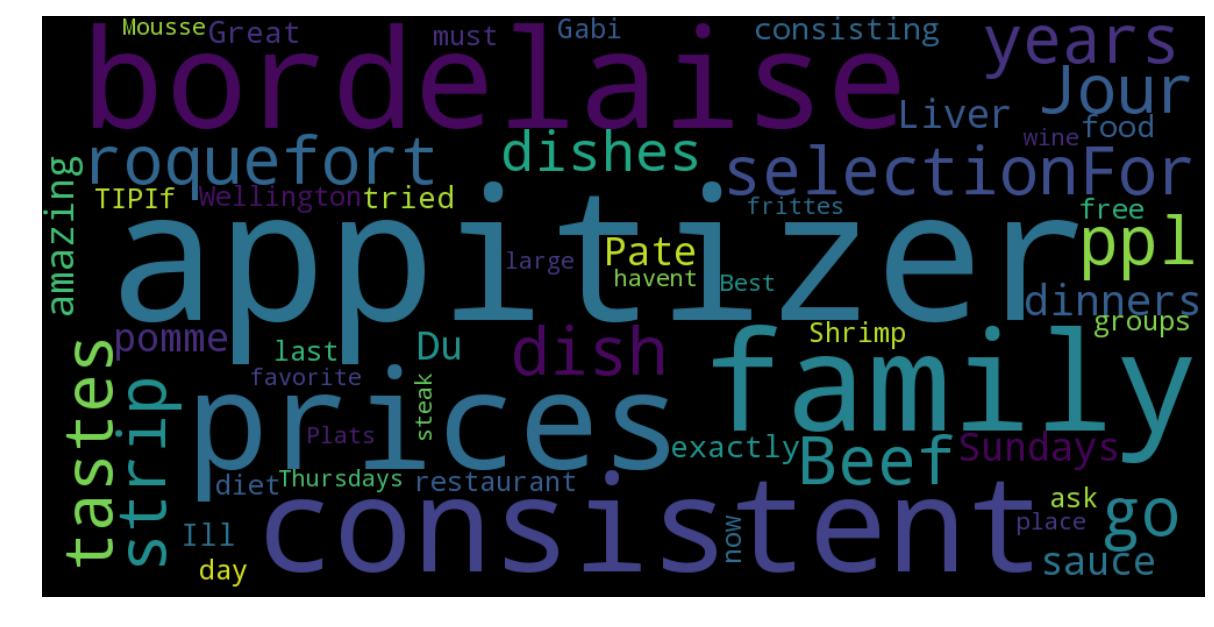

In [325]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
# for text in [text]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords).generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
high_r

In [411]:
pairs = high_r.map(lambda x: (x[6],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# # print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  useful:" % (i+1),
#         print res[i]
pairs8.take(30)        

[(u'good', 16),
 (u'food', 16),
 (u'service', 16),
 (u'got', 15),
 (u'meal', 13),
 (u'Mon', 12),
 (u'go', 12),
 (u'Ami', 12),
 (u'steak', 11),
 (u'restaurant', 10),
 (u'really', 10),
 (u'Vegas', 10),
 (u'place', 10),
 (u'Gabi', 9),
 (u'like', 9),
 (u'also', 9),
 (u'get', 8),
 (u'table', 8),
 (u'time', 8),
 (u'back', 8),
 (u'come', 8),
 (u'fries', 8),
 (u'great', 8),
 (u'outside', 8),
 (u'waitress', 8),
 (u'eat', 7),
 (u'Our', 7),
 (u'bread', 7),
 (u'made', 7),
 (u'service', 7)]

In [408]:
pairs = high_r.map(lambda x: (x[7],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)

# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))
# res.append(pairs8.take(30))

# print the result
# print "top 20 common words"
# print res
# print "top 20 common words"
# for i in range(0, 15):
#         print "%d  funny:" % (i+1),
#         print res[i]
pairs8.take(30)        

[(u'good', 7),
 (u'service', 7),
 (u'restaurant', 6),
 (u'place', 6),
 (u'food', 6),
 (u'18', 6),
 (u'time', 5),
 (u'bloody', 5),
 (u'patio', 5),
 (u'place', 5),
 (u'great', 5),
 (u'back', 5),
 (u'patio', 5),
 (u'Gabi', 4),
 (u'get', 4),
 (u'view', 4),
 (u'food', 4),
 (u'like', 4),
 (u'fries', 4),
 (u'back', 4),
 (u'waiting', 4),
 (u'steak', 4),
 (u'dark', 4),
 (u'mary', 4),
 (u'show', 4),
 (u'awesome', 4),
 (u'wait', 4),
 (u'got', 4),
 (u'fries', 4),
 (u'little', 4)]

In [407]:
pairs = high_r.map(lambda x: (x[8],x[5]))
pairs0 = pairs.map(lambda x: (x[0], x[1].replace("\n", " ")))
pairs1 = pairs0.mapValues(lambda x: x.translate(table))
pairs2 = pairs1.flatMapValues(lambda x: x.split(" "))
pairs3 = pairs2.map(lambda x: (x, 1))
pairs4 = pairs3.reduceByKey(lambda x, y: x+y)
pairs5 = pairs4.filter(lambda x: not x[0][1] in stop3)
pairs6 = pairs5.filter(lambda x: x[0][0] != 0)
# rating = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# res = []
# for value in rating:
#     pairs6 = pairs5.filter(lambda x: value in x[0])
pairs7 = pairs6.sortBy(lambda x: x[1], ascending=False)
pairs8 = pairs7.map(lambda x: (x[0][1],x[1]))


# print the result
# print "top 20 common words"
# print res
# print "top common words"
# for i in range(0, 15):
#         print "%d  cool:" % (i+1),
#         print res[i]
pairs8.take(30)        

[(u'good', 15),
 (u'service', 15),
 (u'food', 13),
 (u'place', 13),
 (u'patio', 12),
 (u'get', 10),
 (u'meal', 10),
 (u'made', 9),
 (u'steak', 9),
 (u'got', 9),
 (u'Vegas', 8),
 (u'time', 8),
 (u'go', 8),
 (u'view', 7),
 (u'table', 7),
 (u'people', 7),
 (u'like', 7),
 (u'Bellagio', 7),
 (u'reservation', 7),
 (u'cheese', 7),
 (u'seating', 7),
 (u'breakfast', 7),
 (u'best', 7),
 (u'pretty', 7),
 (u'wait', 6),
 (u'scallops', 6),
 (u'eat', 6),
 (u'Mon', 6),
 (u'wine', 6),
 (u'order', 6)]